# Want to do a kickstarter?

## An analysis on kickstarters using python 

This notebook is looking into a dataset showing thousands of kickstater projects to see what projects are successful and projects that are not successful. 

In [1]:
import pandas as pd 
import numpy as np 

main_dataset = pd.read_csv('ks-projects-201801.csv')

In [2]:
main_dataset

,ID,name,category,main_category,currency,deadline,goal,launched,pledged,state,backers,country,usd pledged,usd_pledged_real,usd_goal_real
0,1000002330,The Songs of Adelaide & Abullah,Poetry,Publishing,GBP,10/9/2015,1000.0,8/11/2015 12:12,0.0,failed,0,GB,0.0,0.0,1533.95
1,1000003930,Greeting From Earth: ZGAC Arts Capsule For ET,Narrative Film,Film & Video,USD,11/1/2017,30000.0,9/2/2017 4:43,2421.0,failed,15,US,100.0,2421.0,30000.00
2,1000004038,Where is Hank?,Narrative Film,Film & Video,USD,2/26/2013,45000.0,1/12/2013 0:20,220.0,failed,3,US,220.0,220.0,45000.00
3,1000007540,ToshiCapital Rekordz Needs Help to Complete Album,Music,Music,USD,4/16/2012,5000.0,3/17/2012 3:24,1.0,failed,1,US,1.0,1.0,5000.00
4,1000011046,Community Film Project: The Art of Neighborhoo...,Film & Video,Film & Video,USD,8/29/2015,19500.0,7/4/2015 8:35,1283.0,canceled,14,US,1283.0,1283.0,19500.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
378656,999976400,ChknTruk Nationwide Charity Drive 2014 (Canceled),Documentary,Film & Video,USD,10/17/2014,50000.0,9/17/2014 2:35,25.0,canceled,1,US,25.0,25.0,50000.00
378657,999977640,The Tribe,Narrative Film,Film & Video,USD,7/19/2011,1500.0,6/22/2011 3:35,155.0,failed,5,US,155.0,155.0,1500.00
378658,999986353,Walls of Remedy- New lesbian Romantic Comedy f...,Narrative Film,Film & Video,USD,8/16/2010,15000.0,7/1/2010 19:40,20.0,failed,1,US,20.0,20.0,15000.00
378659,999987933,BioDefense Education Kit,Technology,Technology,USD,2/13/2016,15000.0,1/13/2016 18:13,200.0,failed,6,US,200.0,200.0,15000.00


As we can see, we have information for over 370,000 projects that were put on kickstarter. We will be first running a quick pd.info() function to obtain information on the d-types each of these columns are. The next step after that is to delete any column we will not be needing and dividing this df into 3 seperate lists(possible df's): successful projects, failed projects, and cancelled projects. 

In [3]:
#gather basic info on the d-types for each column
main_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 378661 entries, 0 to 378660
Data columns (total 15 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   ID                378661 non-null  int64  
 1   name              378657 non-null  object 
 2   category          378661 non-null  object 
 3   main_category     378661 non-null  object 
 4   currency          378661 non-null  object 
 5   deadline          378661 non-null  object 
 6   goal              378661 non-null  float64
 7   launched          378661 non-null  object 
 8   pledged           378661 non-null  float64
 9   state             378661 non-null  object 
 10  backers           378661 non-null  int64  
 11  country           378661 non-null  object 
 12  usd pledged       374864 non-null  float64
 13  usd_pledged_real  378661 non-null  float64
 14  usd_goal_real     378661 non-null  float64
dtypes: float64(5), int64(2), object(8)
memory usage: 43.3+ MB


Looking at the information above, we are starting to get a general understanding of the dataframe/dataset. Understanding what is a float, int, or an object will help us going forward in order to use the correct code when it comes to reading strings or making int conversions. 

In [4]:
#renaming certain column names within the dataset
main_dataset = main_dataset.rename(columns={"state" : "project_result", "backers" : "num_of_pledges", "usd pledged" : "usd_pledged", "pledged" : "total_amount_pledged"})

## Creating Two New Datasets

We will be making two new datasets: 
* one for successful projects 
* one for failed projects
 
We will analize more detailed information from the two datasets.

In [5]:
#making two new data sets, success and fail, to further investigate each of them
failed_dataset = main_dataset.loc[main_dataset["project_result"] == "failed"]
successful_dataset = main_dataset.loc[main_dataset["project_result"] == "successful"]


In [6]:
#convert number in dataset to make them easier to read
pd.options.display.float_format = '{:.2f}'.format

In [7]:
failed_dataset.describe(include='all')

,ID,name,category,main_category,currency,deadline,goal,launched,total_amount_pledged,project_result,num_of_pledges,country,usd_pledged,usd_pledged_real,usd_goal_real
count,197719.00,197716,197719,197719,197719,197719,197719.00,197719,197719.00,197719,197719.00,197719,197614.00,197719.00,197719.00
unique,NaN,196744,159,15,14,3065,NaN,187955,NaN,1,NaN,23,NaN,NaN,NaN
top,NaN,#NAME?,Product Design,Film & Video,USD,8/8/2014,NaN,7/11/2014 21:14,NaN,failed,NaN,US,NaN,NaN,NaN
freq,NaN,18,10718,32904,152132,472,NaN,6,NaN,197719,NaN,152061,NaN,NaN,NaN
mean,1074638761.48,NaN,NaN,NaN,NaN,NaN,67346.85,NaN,1426.97,NaN,16.42,NaN,1133.74,1320.60,63174.74
std,619221482.93,NaN,NaN,NaN,NaN,NaN,1447226.94,NaN,9564.41,NaN,71.22,NaN,6221.65,6820.25,1435682.63
min,5971.00,NaN,NaN,NaN,NaN,NaN,0.15,NaN,0.00,NaN,0.00,NaN,0.00,0.00,0.15
25%,538564152.50,NaN,NaN,NaN,NaN,NaN,2500.00,NaN,3.00,NaN,1.00,NaN,0.00,2.64,2500.00
50%,1073242479.00,NaN,NaN,NaN,NaN,NaN,7500.00,NaN,100.00,NaN,3.00,NaN,66.00,100.00,7500.00
75%,1611052447.00,NaN,NaN,NaN,NaN,NaN,20000.00,NaN,671.00,NaN,12.00,NaN,512.00,663.00,20000.00


In [8]:
successful_dataset.describe(include='all')

,ID,name,category,main_category,currency,deadline,goal,launched,total_amount_pledged,project_result,num_of_pledges,country,usd_pledged,usd_pledged_real,usd_goal_real
count,133956.00,133956,133956,133956,133956,133956,133956.00,133956,133956.00,133956,133956.00,133956,133851.00,133956.00,133956.00
unique,NaN,133544,159,15,14,3067,NaN,129762,NaN,1,NaN,23,NaN,NaN,NaN
top,NaN,#NAME?,Product Design,Music,USD,12/1/2017,NaN,6/20/2017 16:00,NaN,successful,NaN,US,NaN,NaN,NaN
freq,NaN,19,7962,24197,109379,158,NaN,13,NaN,133956,NaN,109299,NaN,NaN,NaN
mean,1073727308.41,NaN,NaN,NaN,NaN,NaN,10162.96,NaN,24099.78,NaN,263.92,NaN,17356.03,22670.80,9532.85
std,619151364.61,NaN,NaN,NaN,NaN,NaN,31248.29,NaN,158471.27,NaN,1504.58,NaN,130122.81,151090.32,27961.44
min,21109.00,NaN,NaN,NaN,NaN,NaN,0.01,NaN,1.00,NaN,0.00,NaN,0.00,0.79,0.01
25%,535444349.00,NaN,NaN,NaN,NaN,NaN,1250.00,NaN,1977.75,NaN,33.00,NaN,1162.00,2000.00,1301.91
50%,1076595218.50,NaN,NaN,NaN,NaN,NaN,3923.00,NaN,5117.00,NaN,71.00,NaN,3655.66,5107.25,3837.74
75%,1608161317.00,NaN,NaN,NaN,NaN,NaN,10000.00,NaN,13440.25,NaN,167.00,NaN,10426.00,13232.08,10000.00


So, there is a lot of information to take in from the last few cells. We seperated the main dataset into two serperate datasets based on if they failed or succeeded. Then, we ran them through a describe method, which devideds up the average number that takes place within each column. To get an idea of what the average dollar amount was put into a successful/failed kickstater, you simply look at the usd_pledged_real column, maen row, and you will see the average amount put into either a successful or failed kickstater. Example, 22,670.80 was the average amount for a successful kickstater, while 1320.60 was the average amount for a failed kickstater. That is a staggering amount of difference between the two. We can start to look at these categories using visualizations to get a better understanding. 

In [9]:
# get total amount pledged, number of pledges, and goals into a dataframe to put into visualization. 
import matplotlib.pyplot as plt

## Comparison Graph of Successful and Failed Kickstarters

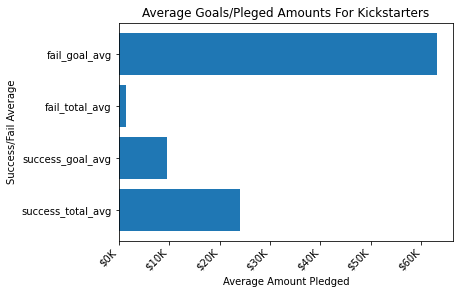

In [10]:
success_fail_graph = {
    'success_total_avg' : 24100,
    'success_goal_avg' : 9533,
    'fail_total_avg' : 1427,
    'fail_goal_avg' : 63175
}

#function that formats currencies on the x-axis in our graphs
def currency(x, pos):
    if x >= 1e6:
        s = '${:1.1f}M'.format(x*1e-6)
    else:
        s = '${:1.0f}K'.format(x*1e-3)
    return s


success_fail_values = list(success_fail_graph.values())
success_fail_keys = list(success_fail_graph.keys())
graph_mean = np.mean(success_fail_values)
fig, ax = plt.subplots()
ax.barh(success_fail_keys, success_fail_values)
labels = ax.get_xticklabels()
plt.setp(labels, rotation=45, horizontalalignment='right')
ax.set(xlabel='Average Amount Pledged', ylabel='Success/Fail Average', title='Average Goals/Pleged Amounts For Kickstarters')
ax.xaxis.set_major_formatter(currency)

After reoganizing the successful and failed kickstarters, I took the info from both datasets and looked at the total amount of money on average were put into succeful and failed kickstarters, as well as what the goal total was on average for each dataset. Looking at the datasets on a surface level, we can see the huge amount of difference between the average amount given and what the goal amount was for the failed dataset. There is still a big difference for the succefulamount given and goal amount as well. It is possible the amount of goal money for failed kickstarters was just too high and unrealistic to ever reach those goals. The next step in this analysis is to see the categories in each dataset and see if there was a category that could have been more succeful/not successful. 

## Even More Datasets! Taking a Deeper Look at Kickstarter Categories

So no we have a brief idea of the differences between successful and failed Kickstarters, we are going to take a closer look at their specific Categories to see whcih ones do the best.

In [11]:
#making a new dataset to see the categories that were successful and how much their goals were on average, how much was pledged in total
successful_categories = successful_dataset[['name', 'category', 'main_category', 'goal', 'total_amount_pledged']]
successful_categories.head(10)

,name,category,main_category,goal,total_amount_pledged
5,Monarch Espresso Bar,Restaurants,Food,50000.00,52375.00
6,Support Solar Roasted Coffee & Green Energy! ...,Food,Food,1000.00,1205.00
11,Lisa Lim New CD!,Indie Rock,Music,12500.00,12700.00
14,Tombstone: Old West tabletop game and miniatur...,Tabletop Games,Games,5000.00,94175.00
18,Mike Corey's Darkness & Light Album,Music,Music,250.00,250.00
20,CMUK. Shoes: Take on Life Feet First.,Fashion,Fashion,20000.00,34268.00
24,The Book Zoo - A Mini-Comic,Comics,Comics,175.00,701.66
25,Matt Cavenaugh & Jenny Powers make their 1st a...,Music,Music,10000.00,15827.00
27,Permaculture Skills,Webseries,Film & Video,17757.00,48905.00
28,Rebel Army Origins: The Heroic Story Of Major ...,Comics,Comics,100.00,112.38


In [12]:
#using the value_counts function to see what category occurs the most in the main category
main_category_dataset = (successful_categories['main_category'].value_counts(normalize=True) * 100)
print(main_category_dataset)
top_10_categories = successful_categories['main_category'].value_counts().head(10).index
top_10_categories

Music          18.06
Film & Video   17.63
Games           9.34
Publishing      9.18
Art             8.59
Design          7.88
Theater         4.88
Technology      4.80
Food            4.54
Comics          4.36
Fashion         4.18
Photography     2.47
Dance           1.75
Crafts          1.58
Journalism      0.76
Name: main_category, dtype: float64


Index(['Music', 'Film & Video', 'Games', 'Publishing', 'Art', 'Design',
       'Theater', 'Technology', 'Food', 'Comics'],
      dtype='object')

In [13]:
side_category_dataset = (successful_categories['category'].value_counts(normalize=True, dropna=True) * 100)
print(side_category_dataset)
top_10_side_categories = successful_categories['category'].value_counts().head(10).index
top_10_side_categories

Product Design    5.94
Tabletop Games    5.87
Shorts            4.98
Music             4.80
Documentary       4.42
                  ... 
Chiptune          0.02
Quilts            0.01
Embroidery        0.01
Literary Spaces   0.01
Taxidermy         0.00
Name: category, Length: 159, dtype: float64


Index(['Product Design', 'Tabletop Games', 'Shorts', 'Music', 'Documentary',
       'Theater', 'Indie Rock', 'Rock', 'Art', 'Food'],
      dtype='object')

In [14]:
#using a for-loop to append categories and how much money is pleged on average to a dictionary

avg_main_category_pledged = {}

for categories in top_10_categories:
    main_cat_only = successful_dataset[successful_dataset["main_category"] == categories]

    mean_amount = main_cat_only['total_amount_pledged'].mean()

    avg_main_category_pledged[categories] = int(mean_amount)

avg_main_category_pledged

{'Music': 7543,
 'Film & Video': 14380,
 'Games': 56018,
 'Publishing': 10204,
 'Art': 7836,
 'Design': 69272,
 'Theater': 6113,
 'Technology': 98603,
 'Food': 18039,
 'Comics': 11902}

In [15]:
avg_side_category_pledged = {}

for side_categories in top_10_side_categories:
    side_cat_only = successful_dataset[successful_dataset['category'] == side_categories]

    side_mean_amount = side_cat_only['total_amount_pledged'].mean()

    avg_side_category_pledged[side_categories] = int(side_mean_amount)

avg_side_category_pledged

{'Product Design': 80152,
 'Tabletop Games': 58540,
 'Shorts': 5571,
 'Music': 9205,
 'Documentary': 20559,
 'Theater': 5659,
 'Indie Rock': 5746,
 'Rock': 6096,
 'Art': 8911,
 'Food': 18325}

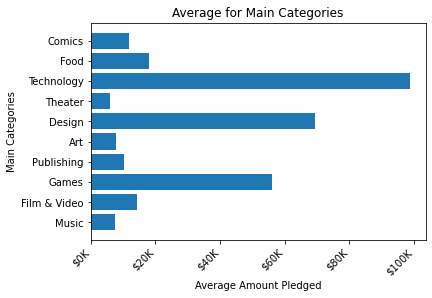

In [16]:
#creating a graph and customizing it from the main_categories dictionary and side categories dictionary. 
avg_cat_pleged_values = list(avg_main_category_pledged.values())
avg_cat_pleged_keys = list(avg_main_category_pledged.keys())
graph_mean = np.mean(avg_cat_pleged_values)
fig, ax = plt.subplots()
ax.barh(avg_cat_pleged_keys, avg_cat_pleged_values)
labels = ax.get_xticklabels()
plt.setp(labels, rotation=45, horizontalalignment='right')
ax.set(xlabel='Average Amount Pledged', ylabel='Main Categories', title='Average for Main Categories')
ax.xaxis.set_major_formatter(currency)

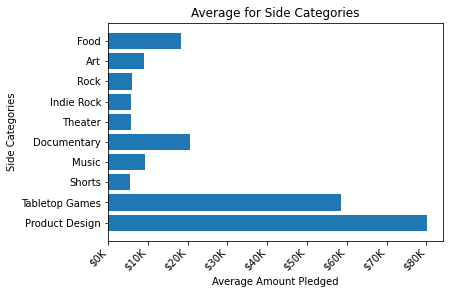

In [17]:
avg_side_cat_pleged_values = list(avg_side_category_pledged.values())
avg_side_cat_pleged_keys = list(avg_side_category_pledged.keys())
graph_mean = np.mean(avg_side_cat_pleged_values)
fig, ax = plt.subplots()
ax.barh(avg_side_cat_pleged_keys, avg_side_cat_pleged_values)
labels = ax.get_xticklabels()
plt.setp(labels, rotation=45, horizontalalignment='right')
ax.set(xlabel='Average Amount Pledged', ylabel='Side Categories', title='Average for Side Categories')
ax.xaxis.set_major_formatter(currency)